In [2]:
%load_ext autoreload
%autoreload 2

In [10]:
from collab_env.gnn.analyze_results import load_results, results_to_dataframe, get_summary_stats
from collab_env.data.file_utils import get_project_root, expand_path
from rich import print
import numpy as np

In [4]:
results_path = expand_path("./results", get_project_root())

print(f"Loading results from {results_path}...")

Loading results from /Users/dima/git/collab-environment/results...


In [5]:
res = load_results(results_path)
res

[{'data_name': 'boid_food_basic',
  'model_output': '/workspace/collab-environment/trained_models/boid_food_basic_vpluspplus_a_n0_h3_vr0.5_s1.pt',
  'model_spec_path': '/workspace/collab-environment/trained_models/boid_food_basic_vpluspplus_a_n0_h3_vr0.5_s1_model_spec.pkl',
  'train_spec_path': '/workspace/collab-environment/trained_models/boid_food_basic_vpluspplus_a_n0_h3_vr0.5_s1_train_spec.pkl',
  'train_losses': '[[0.02597301 0.00190696 0.00178913 0.00182584 0.00182886 0.00170188\n  0.00180889 0.00176935 0.00179677 0.00181781 0.00174368 0.00171987\n  0.00169295 0.00173824]\n [0.00173394 0.00169337 0.00175061 0.00180236 0.00185087 0.00157097\n  0.00176093 0.00166991 0.0016358  0.00172319 0.00175148 0.00175754\n  0.00166802 0.00180163]\n [0.00170701 0.00179478 0.00158838 0.00163478 0.00183676 0.00158304\n  0.00169636 0.00168905 0.00172684 0.00166088 0.00166035 0.00155516\n  0.00165454 0.00163693]\n [0.00167166 0.00161301 0.00165455 0.00174207 0.00153657 0.00161129\n  0.00161892 0.00

In [7]:
df = results_to_dataframe(res)
df.head()

,data_name,model_output,model_spec_path,train_spec_path,train_losses,model_name,noise,heads,visual_range,seed,final_loss,status,gpu_id,worker_id,source_file,config
0,boid_food_basic,/workspace/collab-environment/trained_models/b...,/workspace/collab-environment/trained_models/b...,/workspace/collab-environment/trained_models/b...,[[0.02597301 0.00190696 0.00178913 0.00182584 ...,vpluspplus_a,0.000,3,0.5,1,0.001643,success,5,11,results_boid_food_basic_20250822_173508.json,vpluspplus_a_n0.0_h3_vr0.5
1,boid_food_basic,/workspace/collab-environment/trained_models/b...,/workspace/collab-environment/trained_models/b...,/workspace/collab-environment/trained_models/b...,[[0.10030443 0.00223875 0.00174704 0.00174638 ...,vpluspplus_a,0.000,1,0.5,1,0.001580,success,1,1,results_boid_food_basic_20250822_173508.json,vpluspplus_a_n0.0_h1_vr0.5
2,boid_food_basic,/workspace/collab-environment/trained_models/b...,/workspace/collab-environment/trained_models/b...,/workspace/collab-environment/trained_models/b...,[[0.02134833 0.00180718 0.00171636 0.00175147 ...,vpluspplus_a,0.005,2,0.5,3,0.001572,success,5,23,results_boid_food_basic_20250822_173508.json,vpluspplus_a_n0.005_h2_vr0.5
3,boid_food_basic,/workspace/collab-environment/trained_models/b...,/workspace/collab-environment/trained_models/b...,/workspace/collab-environment/trained_models/b...,[[0.01674098 0.00178875 0.00175191 0.00174491 ...,vpluspplus_a,0.000,2,0.5,0,0.001564,success,5,5,results_boid_food_basic_20250822_173508.json,vpluspplus_a_n0.0_h2_vr0.5
4,boid_food_basic,/workspace/collab-environment/trained_models/b...,/workspace/collab-environment/trained_models/b...,/workspace/collab-environment/trained_models/b...,[[0.0126767 0.00200463 0.00182843 0.00181989 ...,vpluspplus_a,0.005,1,0.5,2,0.001618,success,5,17,results_boid_food_basic_20250822_173508.json,vpluspplus_a_n0.005_h1_vr0.5


In [22]:
import ast
import re
import json
all_losses = {}

def parse_losses(losses_str):
    # Add commas between numbers
    s_json = re.sub(r'(\d)\s+(\d)', r'\1, \2', losses_str)
    # Add commas between rows
    s_json = re.sub(r'\]\s*\[', r'], [', s_json)

    # Parse with JSON
    parsed = json.loads(s_json)
    arr = np.array(parsed)
    return arr

losses_dict = dict(
    (item["model_output"], parse_losses(item["train_losses"]))
    for item in res
) 

len(losses_dict)


30

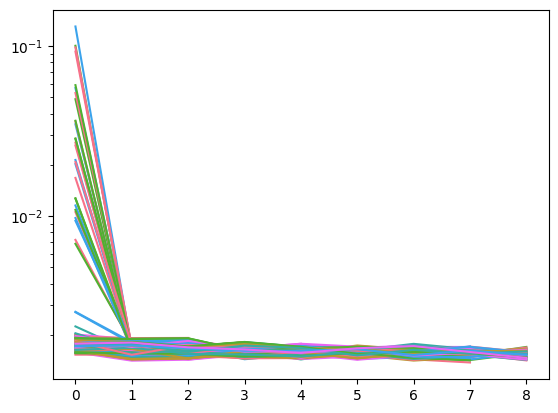

In [25]:
from matplotlib import pyplot as plt

for name, losses in losses_dict.items():
    plt.semilogy(losses, label=name)
# plt.legend()
plt.show()

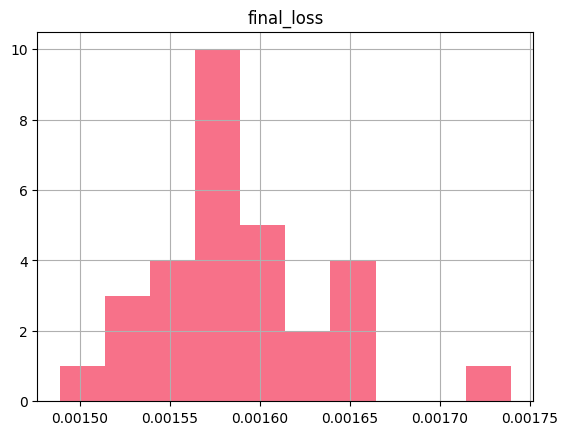

In [27]:
df.hist('final_loss')
plt.show()